<a href="https://colab.research.google.com/github/SGraybill/GEOG456/blob/main/Everest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms
from skimage import io


In [ ]:
src = io.imread("/content/Chapel_Hill_1946.jpg")
ref = io.imread("/content/Chapel_Hill_1978.jpg")
src2 = io.imread("/content/Chapel_Hill_2019.jpg")

matched = match_histograms(src, ref, multichannel=True)
matched2 = match_histograms(src2, ref, multichannel=True)


In [ ]:
io.imsave('/content/1946match.jpg', matched)


In [ ]:
io.imsave('/content/2019matched.jpg', matched2)

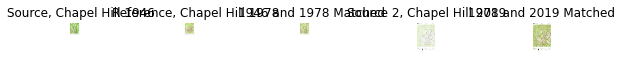

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, figsize=(8, 3),sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4, ax5): 
    aa.set_axis_off()

ax1.imshow(src)
ax1.set_title('Source, Chapel Hill 1946')
ax2.imshow(ref)
ax2.set_title('Reference, Chapel Hill 1978')
ax3.imshow(matched)
ax3.set_title('1946 and 1978 Matched')
ax4.imshow(src2)
ax4.set_title('Source 2, Chapel Hill 2019')
ax5.imshow(matched2)
ax5.set_title('1978 and 2019 Matched')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((src, src2, ref, matched, matched2)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[]
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()